In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import norm
import seaborn as sns

In [2]:
train_data = pd.read_csv('C:/Users/Owner/Downloads/archive/annots_arrs/annot_arrs_train.csv')
test_data = pd.read_csv('C:/Users/Owner/Downloads/archive/annots_arrs/annot_arrs_test.csv')
val_data = pd.read_csv('C:/Users/Owner/Downloads/archive/annots_arrs/annot_arrs_val.csv')

In [3]:
emotion_columns = ['Arousal', 'Dominance', 'Peace', 'Affection', 'Esteem', 'Anticipation', 'Engagement', 
                   'Surprise', 'Sympathy', 'Doubt/Confusion', 'Disconnection', 'Fatigue', 'Yearning', 
                   'Disapproval', 'Aversion', 'Anger', 'Sensitivity', 'Sadness', 'Disquietment', 'Fear', 
                   'Pain', 'Suffering']

In [4]:
train_data = train_data[['Filename'] + emotion_columns]
test_data = test_data[['Filename'] + emotion_columns]
val_data = val_data[['Filename'] + emotion_columns]

In [5]:
print(f"Missing train{train_data.isnull().sum().sum()}")
print(f"Missing test{test_data.isnull().sum().sum()}")
print(f"Missing val{val_data.isnull().sum().sum()}")

Missing train0
Missing test0
Missing val0


In [6]:
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train_data[emotion_columns]), columns= emotion_columns)
test_scaled = pd.DataFrame(scaler.fit_transform(test_data[emotion_columns]), columns= emotion_columns)
val_scaled = pd.DataFrame(scaler.fit_transform(val_data[emotion_columns]), columns= emotion_columns)


In [7]:
train_scaled['Filename'] = train_data['Filename'].values
test_scaled['Filename'] = test_data['Filename'].values
val_scaled['Filename'] = val_data['Filename'].values

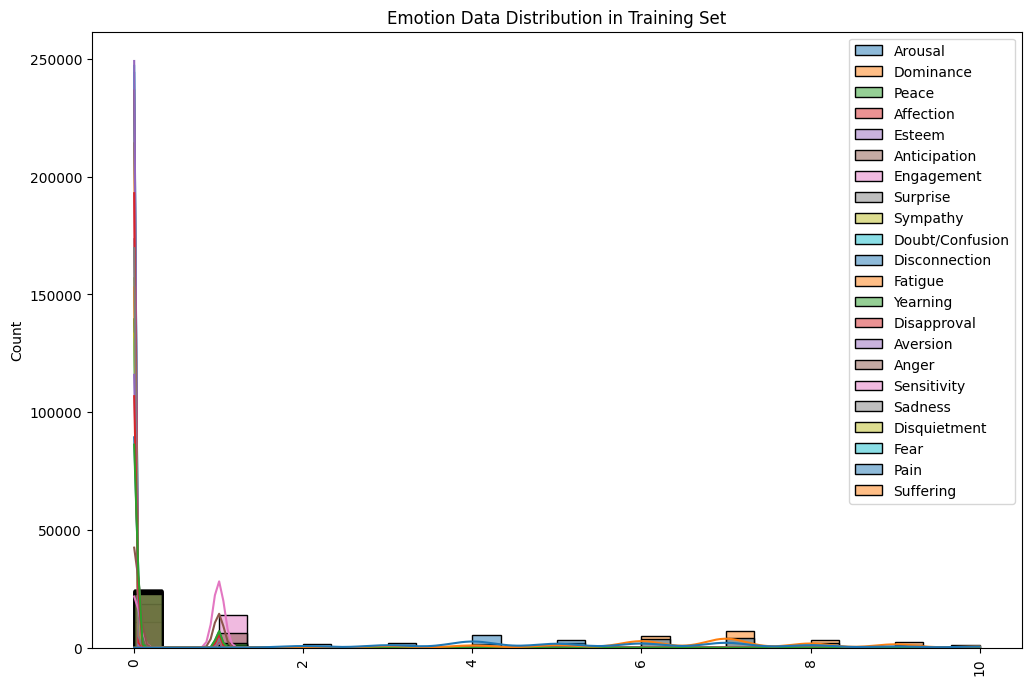

In [8]:
plt.figure(figsize=(12, 8))
sns.histplot(train_data[emotion_columns], kde=True, palette='tab10', bins=30)
plt.title('Emotion Data Distribution in Training Set')
plt.xticks(rotation=90)
plt.show()


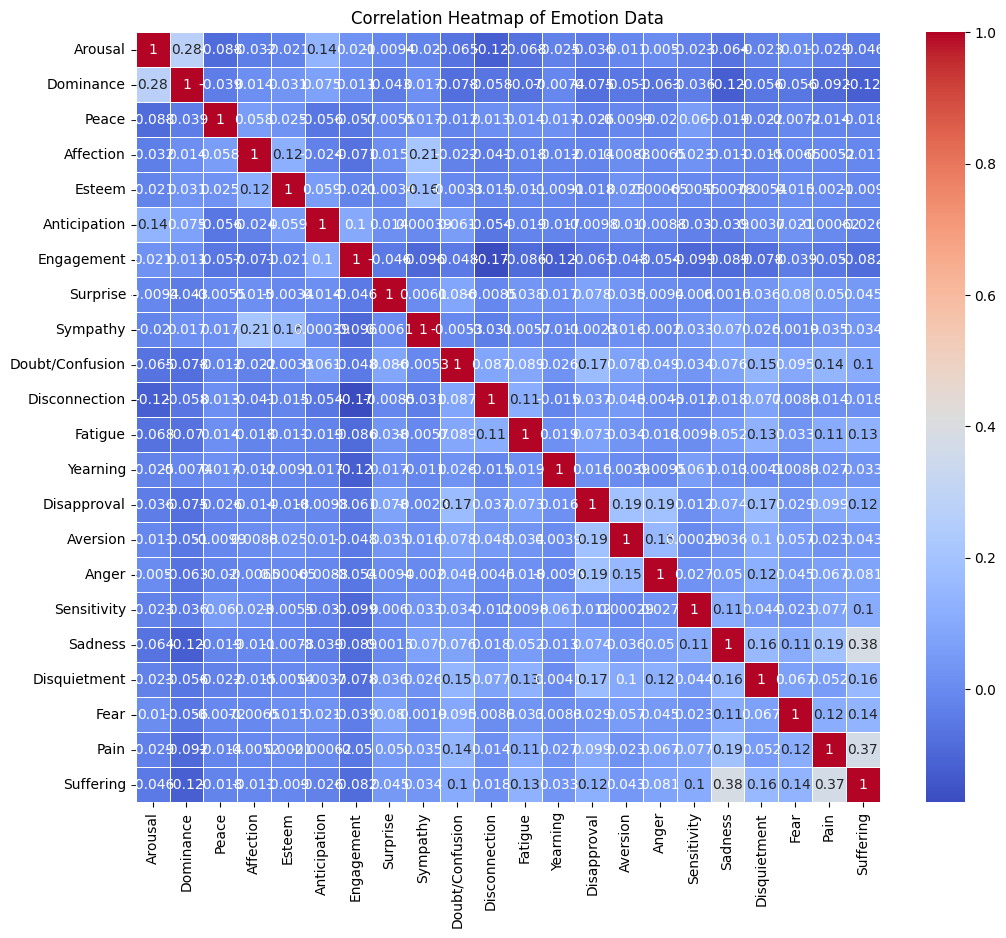

In [9]:
plt.figure(figsize=(12, 10))
sns.heatmap(train_data[emotion_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Emotion Data')
plt.show()


c:\Microsoft VS Code\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


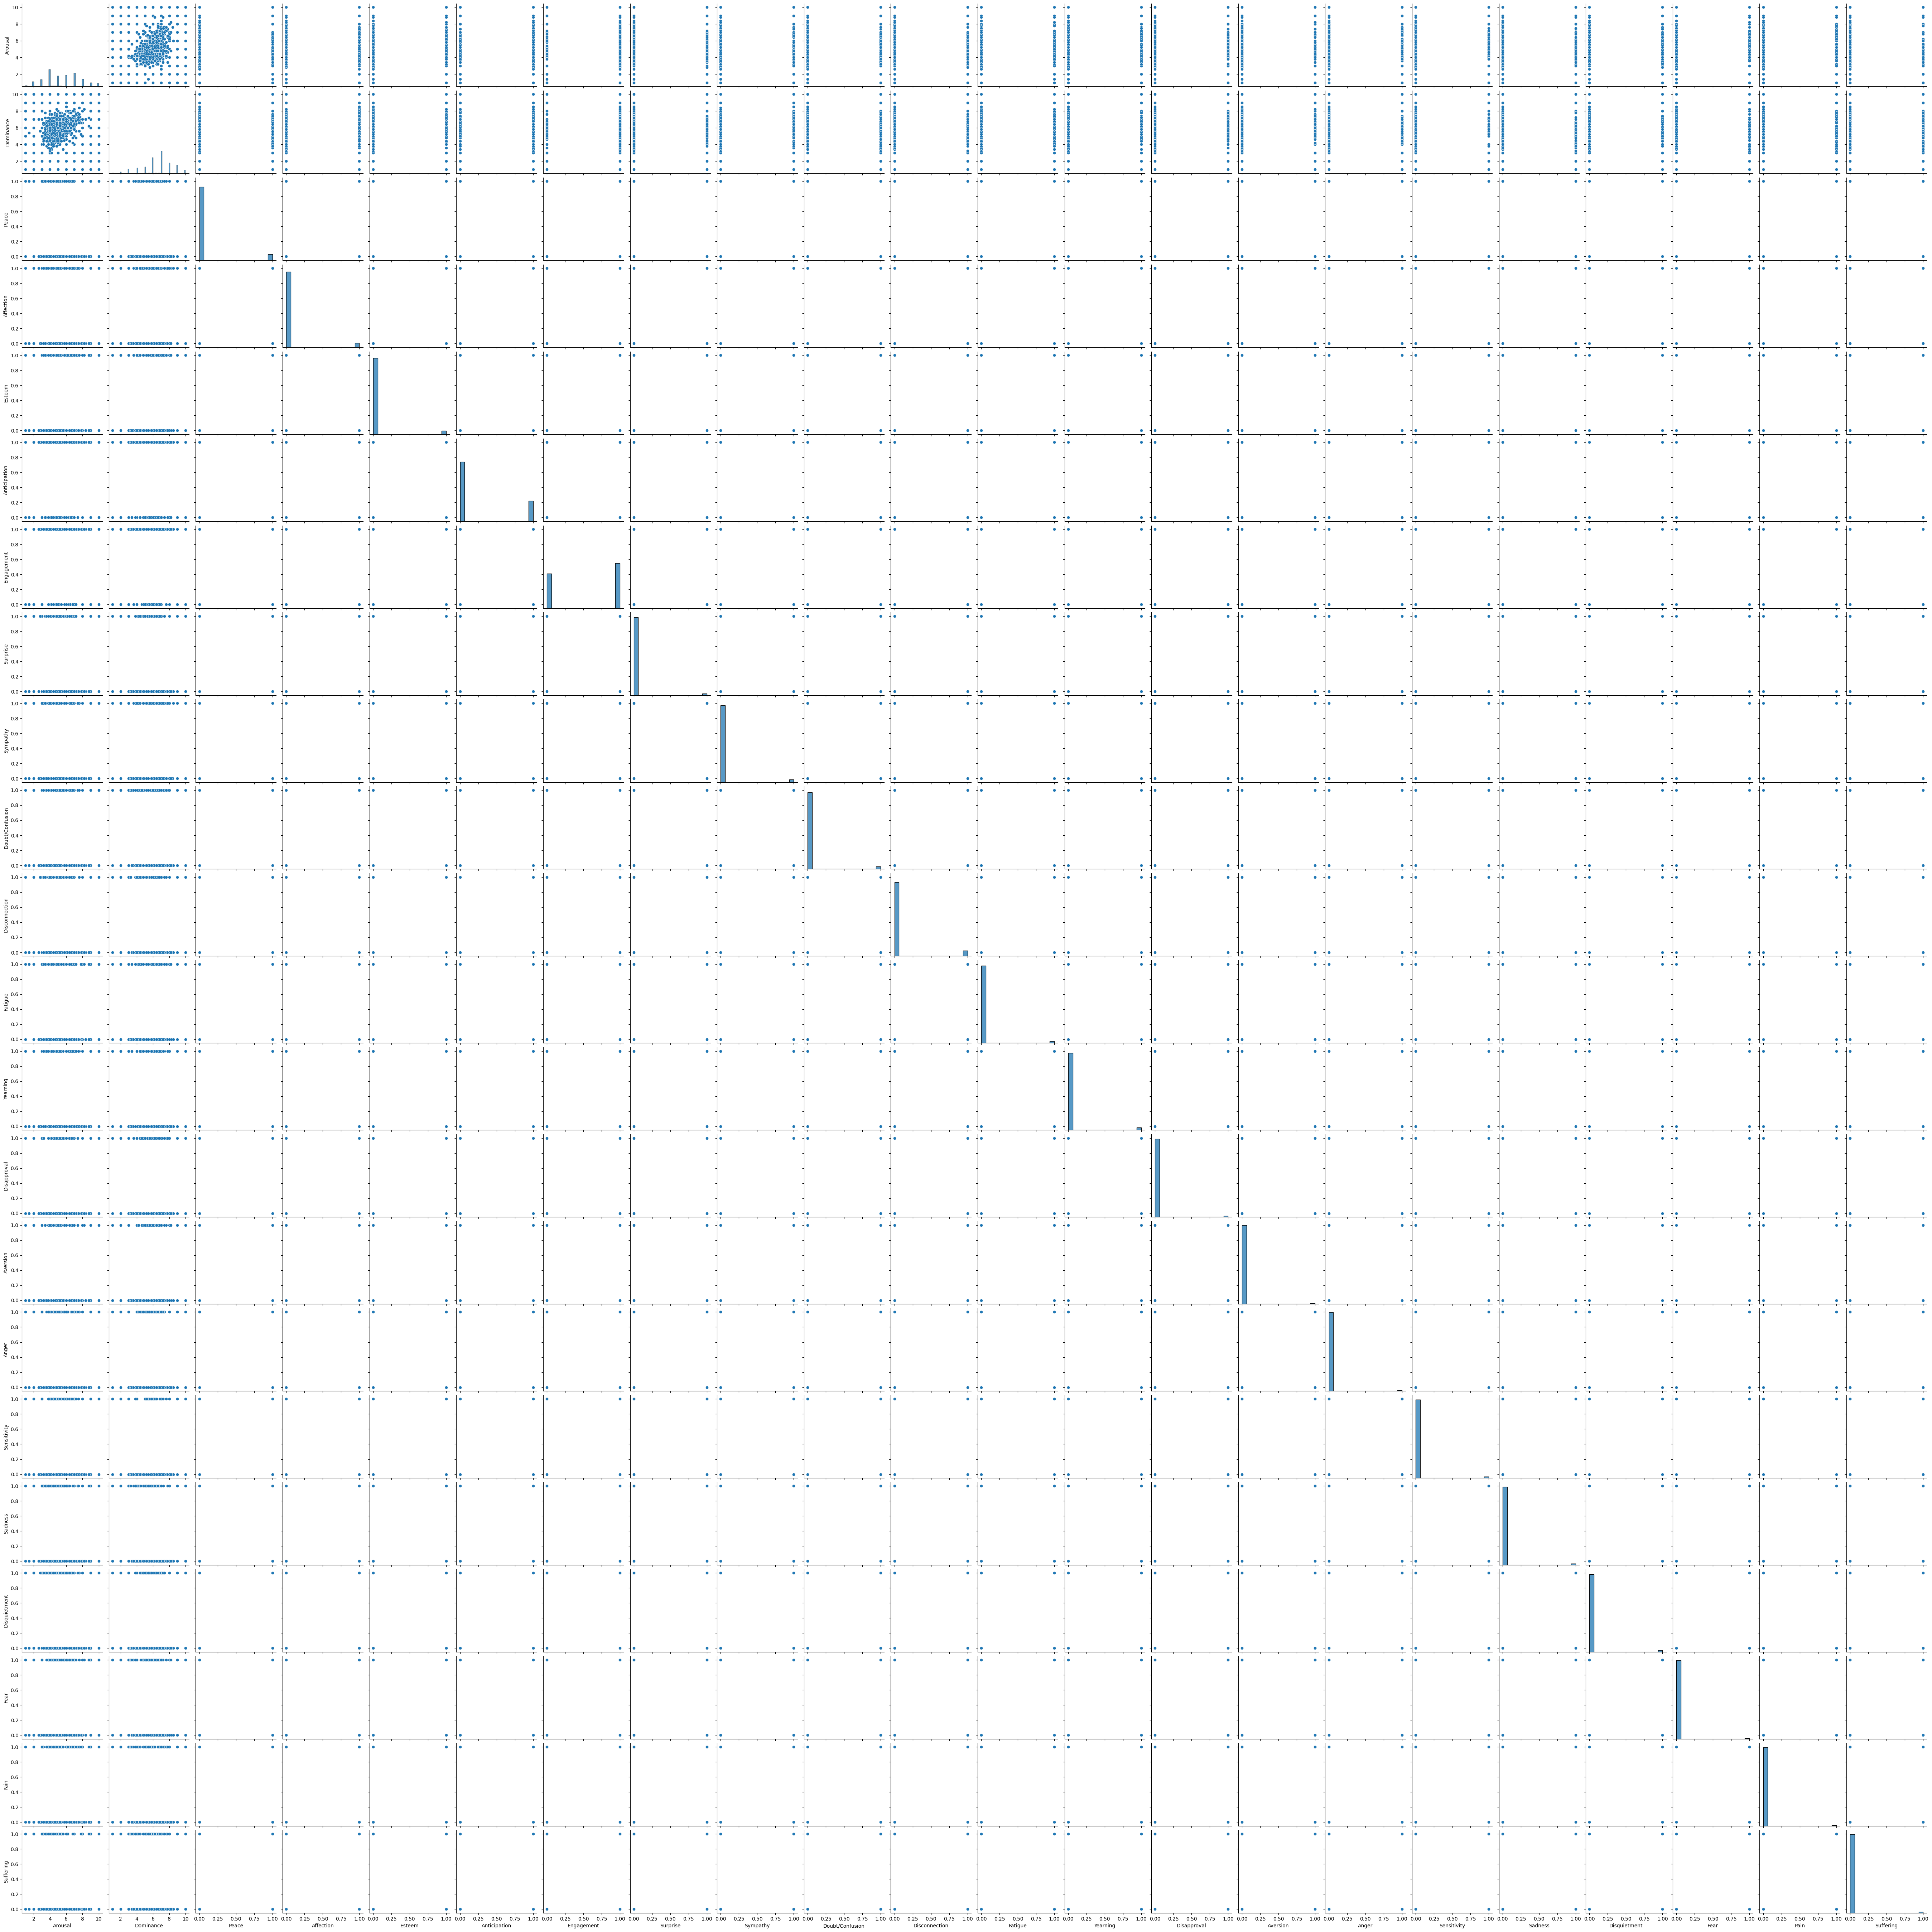

In [10]:
sns.pairplot(train_data[emotion_columns])
plt.show()

In [11]:
columns_to_drop = ['Engagement', 'Yearning', 'Fear', 'Pain']
train_data_cleaned = train_data.drop(columns=columns_to_drop)
test_data_cleaned = test_data.drop(columns=columns_to_drop)
val_data_cleaned = val_data.drop(columns=columns_to_drop)

train_data_cleaned.to_csv('train_data_cleaned.csv', index=False)
test_data_cleaned.to_csv('test_data_cleaned.csv', index=False)
val_data_cleaned.to_csv('val_data_cleaned.csv', index=False)

print("Columns dropped and datasets cleaned.")

Columns dropped and datasets cleaned.


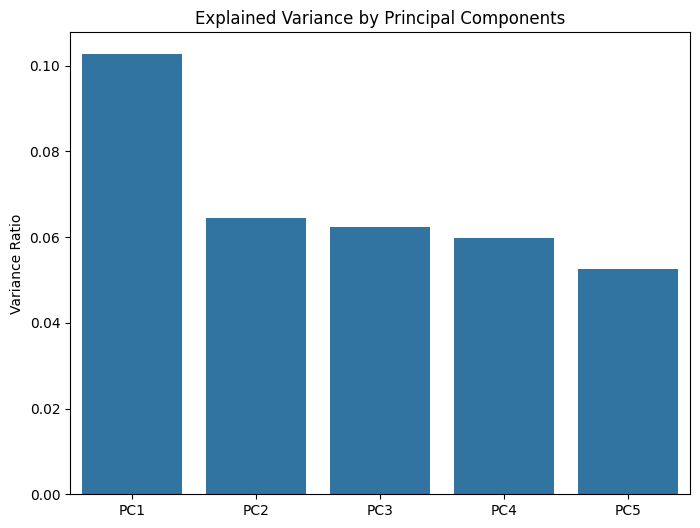

Dimensionality reduction complete. PCA data saved.


In [12]:
from sklearn.decomposition import PCA



# Normalize the emotion data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data.iloc[:, 1:])  # Assuming first column is 'Filename' or ID

# Perform PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 principal components
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Add back any non-emotion columns if necessary (like 'Filename')
pca_df['Filename'] = train_data['Filename']

# Visualize the explained variance of each principal component
plt.figure(figsize=(8, 6))
sns.barplot(x=[f'PC{i+1}' for i in range(pca.n_components_)], y=pca.explained_variance_ratio_)
plt.title('Explained Variance by Principal Components')
plt.ylabel('Variance Ratio')
plt.show()

# Save the PCA result for further use
pca_df.to_csv('train_data_pca.csv', index=False)

print("Dimensionality reduction complete. PCA data saved.")


In [13]:
# Create a DataFrame with the PCA result (principal components)
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Add back any non-emotion columns, if necessary (like 'Filename' or an index)
pca_df['Filename'] = train_data['Filename']  # Assuming 'Filename' exists, adjust as per your dataset

# Save the final PCA-transformed data
pca_df.to_csv('final_pca_transformed_data.csv', index=False)

print("PCA transformation complete. Data saved as 'final_pca_transformed_data.csv'.")


PCA transformation complete. Data saved as 'final_pca_transformed_data.csv'.


In [14]:
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5  \
0  1.695220 -0.334458 -1.947769  1.376988  1.856504   
1 -0.276236 -0.219239  0.156946  0.063187  0.219090   
2 -0.986995 -0.799321  0.536930 -0.374690  0.308718   
3  1.135365 -2.270476  0.750955  4.076242 -0.040008   
4 -0.921491 -0.553864  1.034921  0.060641  2.008739   

                          Filename  
0    COCO_val2014_000000562243.jpg  
1  COCO_train2014_000000288841.jpg  
2    COCO_val2014_000000558171.jpg  
3  COCO_train2014_000000369575.jpg  
4  COCO_train2014_000000213009.jpg  


CGAN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


c:\Microsoft VS Code\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
c:\Microsoft VS Code\lib\site-packages\keras\src\backend\tensorflow\trainer.py:75: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


1/100 [D loss: 0.8470697402954102 | D accuracy: 30.46875] [G loss: [array(0.79390776, dtype=float32), array(0.79390776, dtype=float32), array(0.484375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/100 [D loss: 0.776077151298523 | D accuracy: 48.828125] [G loss: [array(0.7634346, dtype=float32), array(0.7634346, dtype=float32), array(0.5390625, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
3/100 [D loss: 0.7531271576881409 | D accuracy: 55.416667461395264] [G loss: [array(0.7472427, dtype=float32), array(0.7472427, dtype=float32), array(0.5833333, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
4/100 [D loss: 0.7522939443588257 | D accuracy: 56.91964626312256] [G loss: [array(0.7479589, dtype=float32), array(0.7479589, dtype=float32), array(0.59375, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/100 [D loss: 0.7518419623374939 | D accuracy: 57.013893127441406] [G loss: [array(0.74852866, dtype=float32), array(0.74852866, dtype=float32), array(0.5812

10/100 [D loss: 0.7482213973999023 | D accuracy: 53.042763471603394] [G loss: [array(0.74677235, dtype=float32), array(0.74677235, dtype=float32), array(0.53125, dtype=float32)]]
Models saved at epoch 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
11/100 [D loss: 0.7481971979141235 | D accuracy: 51.59631967544556] [G loss: [array(0.7468927, dtype=float32), array(0.7468927, dtype=float32), array(0.51704544, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
12/100 [D loss: 0.7489829063415527 | D accuracy: 51.055824756622314] [G loss: [array(0.7477552, dtype=float32), array(0.7477552, dtype=float32), array(0.51432294, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
13/100 [D loss: 0.7488603591918945 | D accuracy: 51.10095739364624] [G loss: [array(0.74776775, dtype=float32), array(0.74776775, dtype=float32), array(0.5120192, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
14/100 [D loss: 0.7489821910858154 | D accuracy: 50.73991417884827] [G loss: [array(0.7479709, dtype=floa

Models saved at epoch 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
21/100 [D loss: 0.7468357086181641 | D accuracy: 45.63370943069458] [G loss: [array(0.7462136, dtype=float32), array(0.7462136, dtype=float32), array(0.45535713, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
22/100 [D loss: 0.7482890486717224 | D accuracy: 44.578322768211365] [G loss: [array(0.7476746, dtype=float32), array(0.7476746, dtype=float32), array(0.44389203, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
23/100 [D loss: 0.7480741739273071 | D accuracy: 43.75301897525787] [G loss: [array(0.74751204, dtype=float32), array(0.74751204, dtype=float32), array(0.4347826, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
24/100 [D loss: 0.7481526136398315 | D accuracy: 43.02762150764465] [G loss: [array(0.74760157, dtype=float32), array(0.74760157, dtype=float32), array(0.42903647, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
25/100 [D loss: 0.7479737997055054 | D accuracy: 42.5522983074188

30/100 [D loss: 0.7482240796089172 | D accuracy: 39.55022692680359] [G loss: [array(0.7478123, dtype=float32), array(0.7478123, dtype=float32), array(0.39322916, dtype=float32)]]
Models saved at epoch 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
31/100 [D loss: 0.748744010925293 | D accuracy: 38.8484925031662] [G loss: [array(0.7483447, dtype=float32), array(0.7483447, dtype=float32), array(0.3860887, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/100 [D loss: 0.748628556728363 | D accuracy: 38.36301565170288] [G loss: [array(0.7482334, dtype=float32), array(0.7482334, dtype=float32), array(0.38134766, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
33/100 [D loss: 0.7484387159347534 | D accuracy: 37.83544600009918] [G loss: [array(0.74806035, dtype=float32), array(0.74806035, dtype=float32), array(0.37642047, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
34/100 [D loss: 0.7485455274581909 | D accuracy: 37.24690079689026] [G loss: [array(0.7481869, dtype=float32)

40/100 [D loss: 0.7487746477127075 | D accuracy: 34.474387764930725] [G loss: [array(0.7484764, dtype=float32), array(0.7484764, dtype=float32), array(0.34296876, dtype=float32)]]
Models saved at epoch 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
41/100 [D loss: 0.7491828203201294 | D accuracy: 33.93532633781433] [G loss: [array(0.74890524, dtype=float32), array(0.74890524, dtype=float32), array(0.33727133, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
42/100 [D loss: 0.7490254640579224 | D accuracy: 33.665019273757935] [G loss: [array(0.74875367, dtype=float32), array(0.74875367, dtype=float32), array(0.33482143, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
43/100 [D loss: 0.7492406368255615 | D accuracy: 33.18827152252197] [G loss: [array(0.74896264, dtype=float32), array(0.74896264, dtype=float32), array(0.32994187, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
44/100 [D loss: 0.7496886849403381 | D accuracy: 32.75107145309448] [G loss: [array(0.74942744, dty

50/100 [D loss: 0.750638484954834 | D accuracy: 30.339962244033813] [G loss: [array(0.7504144, dtype=float32), array(0.7504144, dtype=float32), array(0.301875, dtype=float32)]]
Models saved at epoch 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
51/100 [D loss: 0.7506623268127441 | D accuracy: 29.926833510398865] [G loss: [array(0.7504423, dtype=float32), array(0.7504423, dtype=float32), array(0.2977941, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
52/100 [D loss: 0.7508334517478943 | D accuracy: 29.620257019996643] [G loss: [array(0.75062114, dtype=float32), array(0.75062114, dtype=float32), array(0.29477164, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
53/100 [D loss: 0.7509515285491943 | D accuracy: 29.354923963546753] [G loss: [array(0.750741, dtype=float32), array(0.750741, dtype=float32), array(0.292158, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
54/100 [D loss: 0.7512762546539307 | D accuracy: 29.012256860733032] [G loss: [array(0.7510693, dtype=float32

Models saved at epoch 60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
61/100 [D loss: 0.752659797668457 | D accuracy: 27.186673879623413] [G loss: [array(0.7524837, dtype=float32), array(0.7524837, dtype=float32), array(0.27074796, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
62/100 [D loss: 0.7527953386306763 | D accuracy: 26.923519372940063] [G loss: [array(0.7526276, dtype=float32), array(0.7526276, dtype=float32), array(0.26814517, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
63/100 [D loss: 0.7524893283843994 | D accuracy: 26.843053102493286] [G loss: [array(0.7523234, dtype=float32), array(0.7523234, dtype=float32), array(0.2673611, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
64/100 [D loss: 0.7525582313537598 | D accuracy: 26.642566919326782] [G loss: [array(0.7524013, dtype=float32), array(0.7524013, dtype=float32), array(0.26538086, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
65/100 [D loss: 0.7529004812240601 | D accuracy: 26.40000581741333]

70/100 [D loss: 0.7534905672073364 | D accuracy: 25.493159890174866] [G loss: [array(0.7533464, dtype=float32), array(0.7533464, dtype=float32), array(0.25401786, dtype=float32)]]


Models saved at epoch 70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
71/100 [D loss: 0.7535585761070251 | D accuracy: 25.353673100471497] [G loss: [array(0.75342077, dtype=float32), array(0.75342077, dtype=float32), array(0.25264084, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
72/100 [D loss: 0.7540640830993652 | D accuracy: 25.130969285964966] [G loss: [array(0.7539262, dtype=float32), array(0.7539262, dtype=float32), array(0.25043404, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
73/100 [D loss: 0.7544795870780945 | D accuracy: 24.806994199752808] [G loss: [array(0.7543453, dtype=float32), array(0.7543453, dtype=float32), array(0.24721746, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
74/100 [D loss: 0.754407525062561 | D accuracy: 24.682486057281494] [G loss: [array(0.7542794, dtype=float32), array(0.7542794, dtype=float32), array(0.24598818, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
75/100 [D loss: 0.7543671131134033 | D accuracy: 24.561312794685

Models saved at epoch 80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
81/100 [D loss: 0.7545287013053894 | D accuracy: 23.703786730766296] [G loss: [array(0.75442, dtype=float32), array(0.75442, dtype=float32), array(0.23630401, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
82/100 [D loss: 0.7543940544128418 | D accuracy: 23.662300407886505] [G loss: [array(0.7542798, dtype=float32), array(0.7542798, dtype=float32), array(0.23589939, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
83/100 [D loss: 0.7543672323226929 | D accuracy: 23.52740466594696] [G loss: [array(0.7542631, dtype=float32), array(0.7542631, dtype=float32), array(0.23456325, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
84/100 [D loss: 0.7545355558395386 | D accuracy: 23.470358550548553] [G loss: [array(0.7544317, dtype=float32), array(0.7544317, dtype=float32), array(0.23400298, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
85/100 [D loss: 0.754405677318573 | D accuracy: 23.396220803260803] [G

Models saved at epoch 90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
91/100 [D loss: 0.7553281188011169 | D accuracy: 22.710227966308594] [G loss: [array(0.75524265, dtype=float32), array(0.75524265, dtype=float32), array(0.22647665, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
92/100 [D loss: 0.7555944919586182 | D accuracy: 22.59894162416458] [G loss: [array(0.75550836, dtype=float32), array(0.75550836, dtype=float32), array(0.22537364, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
93/100 [D loss: 0.7556028366088867 | D accuracy: 22.49005436897278] [G loss: [array(0.7555154, dtype=float32), array(0.7555154, dtype=float32), array(0.22429435, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
94/100 [D loss: 0.7554081678390503 | D accuracy: 22.43349254131317] [G loss: [array(0.7553229, dtype=float32), array(0.7553229, dtype=float32), array(0.2237367, dtype=float32)]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
95/100 [D loss: 0.7556723952293396 | D accuracy: 22.3286509513854

100/100 [D loss: 0.7559769153594971 | D accuracy: 22.00828343629837] [G loss: [array(0.7559024, dtype=float32), array(0.7559024, dtype=float32), array(0.21953125, dtype=float32)]]


Models saved at epoch 100


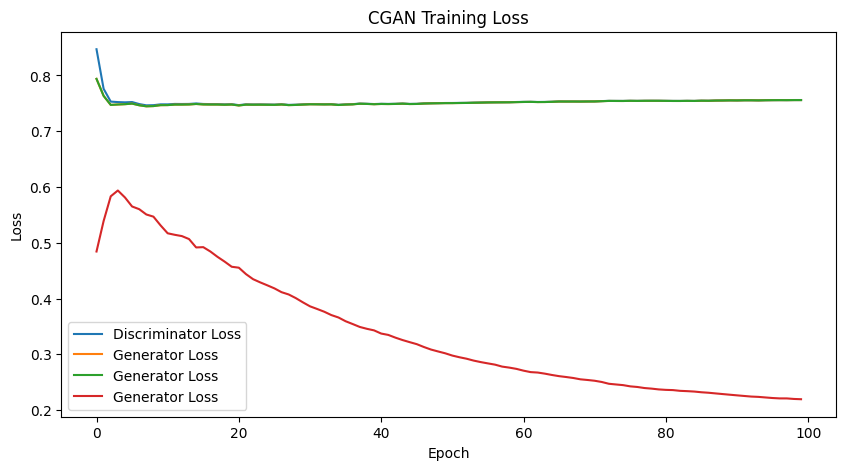

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Validation D loss on real data: 0.7695578336715698 | accuracy: 28.125
Validation D loss on fake data: 0.7268657684326172 | accuracy: 0.0


In [32]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Define generator model (simplified for demonstration)
def build_generator(latent_dim, num_labels, num_features):
    noise = Input(shape=(latent_dim,))
    label = Input(shape=(1,))
    
    label_embedding = tf.keras.layers.Embedding(num_labels, latent_dim)(label)
    label_embedding = tf.keras.layers.Flatten()(label_embedding)
    
    model_input = tf.keras.layers.multiply([noise, label_embedding])
    x = tf.keras.layers.Dense(128)(model_input)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    x = tf.keras.layers.Dense(num_features)(x)
    generated_data = tf.keras.layers.Activation('tanh')(x)
    
    return Model([noise, label], generated_data)

# Define discriminator model (simplified for demonstration)
def build_discriminator(num_features, num_labels):
    features = Input(shape=(num_features,))
    label = Input(shape=(1,))
    
    label_embedding = tf.keras.layers.Embedding(num_labels, num_features)(label)
    label_embedding = tf.keras.layers.Flatten()(label_embedding)
    
    model_input = tf.keras.layers.concatenate([features, label_embedding])
    
    x = tf.keras.layers.Dense(128)(model_input)
    x = tf.keras.layers.LeakyReLU(alpha=0.2)(x)
    validity = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    
    return Model([features, label], validity)

# Build the generator and discriminator
latent_dim = 100  # Latent space dimension (random noise input)
num_labels = 10   # Number of label classes (modify this based on your data)
num_features = 6  # Number of features in the PCA-reduced dataset

generator = build_generator(latent_dim, num_labels, num_features)
discriminator = build_discriminator(num_features, num_labels)

# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the combined CGAN model (generator + discriminator)
noise = Input(shape=(latent_dim,))
label = Input(shape=(1,))
generated_data = generator([noise, label])

# Freeze the discriminator's weights when training the generator
discriminator.trainable = False

validity = discriminator([generated_data, label])
combined = Model([noise, label], validity)

# Compile the combined model
combined.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

# Function to train the CGAN model with loss graph and validation
def train(generator, discriminator, combined, epochs, batch_size, save_interval=10):
    # Prepare cross-validation: Split the dataset into training and validation sets
    real_data_train, real_data_val = train_test_split(real_data, test_size=0.2)
    
    valid = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    # To track losses over time
    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        # ---------------------
        #  Train Discriminator
        # ---------------------
        # Select a random batch of real data from training set
        idx = np.random.randint(0, real_data_train.shape[0], batch_size)
        real_samples = real_data_train[idx]
        labels = np.random.randint(0, num_labels, batch_size)
        
        # Generate a batch of fake data
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        gen_samples = generator.predict([noise, labels])

        # Train the discriminator on real and fake data
        d_loss_real = discriminator.train_on_batch([real_samples, labels], valid)
        d_loss_fake = discriminator.train_on_batch([gen_samples, labels], fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator
        # ---------------------
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = combined.train_on_batch([noise, labels], valid)

        # Track loss
        d_losses.append(d_loss[0])
        g_losses.append(g_loss)

        # Print progress
        print(f"{epoch + 1}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")

        # Save the models at specified intervals
        if (epoch + 1) % save_interval == 0:
            generator.save('cgan_generator.h5')      # Save generator in a single file
            discriminator.save('cgan_discriminator.h5')  # Save discriminator in a single file
            print(f"Models saved at epoch {epoch + 1}")
    
    # Plot training loss history
    plt.figure(figsize=(10, 5))
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generator Loss')
    plt.title('CGAN Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Validate on real data validation set
    idx = np.random.randint(0, real_data_val.shape[0], batch_size)
    real_samples_val = real_data_val[idx]
    val_labels = np.random.randint(0, num_labels, batch_size)
    
    # Generate fake data for validation
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_samples_val = generator.predict([noise, val_labels])
    
    # Evaluate discriminator performance on validation set
    val_loss_real = discriminator.evaluate([real_samples_val, val_labels], valid, verbose=0)
    val_loss_fake = discriminator.evaluate([gen_samples_val, val_labels], fake, verbose=0)

    print(f"Validation D loss on real data: {val_loss_real[0]} | accuracy: {100 * val_loss_real[1]}")
    print(f"Validation D loss on fake data: {val_loss_fake[0]} | accuracy: {100 * val_loss_fake[1]}")

# Example of real data (replace this with your actual real data)
real_data = np.random.normal(0, 1, (1000, num_features))

# Example of calling the train function
train(generator, discriminator, combined, epochs=100, batch_size=32, save_interval=10)


WGAN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/100 [D loss: 6.668161392211914] [G loss: 0.019808683544397354]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/100 [D loss: 3.918194055557251] [G loss: -0.00871057529002428]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
3/100 [D loss: 1.860215187072754] [G loss: -0.02221718244254589]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
4/100 [D loss: 0.5900436043739319] [G loss: -

10/100 [D loss: -1.1964446306228638] [G loss: -0.9228750467300415]
Models saved at epoch 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
11/100 [D loss: -1.5463144779205322] [G loss: -1.2080576419830322]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
12/100 [D loss: -1.764772891998291] [G loss: -1.4909358024597168]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
13/100 [D loss: -2.0840835571289062] [G loss: -1.7173163890838623]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

20/100 [D loss: -2.4287962913513184] [G loss: -2.181124687194824]
Models saved at epoch 20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
21/100 [D loss: -2.6696529388427734] [G loss: -2.181692123413086]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
22/100 [D loss: -2.6142687797546387] [G loss: -2.1845619678497314]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
23/100 [D loss: -2.1402313709259033] [G loss: -2.1658992767333984]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

30/100 [D loss: -2.4635703563690186] [G loss: -2.1694483757019043]
Models saved at epoch 30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
31/100 [D loss: -2.445110321044922] [G loss: -2.173443078994751]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
32/100 [D loss: -2.294372081756592] [G loss: -2.1511237621307373]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
33/100 [D loss: -2.4382991790771484] [G loss: -2.1846261024475098]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

40/100 [D loss: -2.448427677154541] [G loss: -2.2036006450653076]
Models saved at epoch 40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
41/100 [D loss: -2.3830482959747314] [G loss: -2.3040547370910645]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
42/100 [D loss: -2.3827359676361084] [G loss: -2.170300006866455]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
43/100 [D loss: -2.4428305625915527] [G loss: -2.1969242095947266]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

50/100 [D loss: -2.433607339859009] [G loss: -2.2828941345214844]
Models saved at epoch 50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
51/100 [D loss: -2.205716609954834] [G loss: -2.321845531463623]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
52/100 [D loss: -2.547213315963745] [G loss: -2.335930347442627]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
53/100 [D loss: -2.37727689743042] [G loss: -2.2492594718933105]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14

60/100 [D loss: -2.5334415435791016] [G loss: -2.409151554107666]
Models saved at epoch 60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
61/100 [D loss: -2.6387126445770264] [G loss: -2.3436532020568848]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
62/100 [D loss: -2.434628486633301] [G loss: -2.318598747253418]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
63/100 [D loss: -2.5222063064575195] [G loss: -2.3418025970458984]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

70/100 [D loss: -2.425692319869995] [G loss: -2.3595774173736572]
Models saved at epoch 70
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
71/100 [D loss: -2.6006271839141846] [G loss: -2.5001306533813477]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
72/100 [D loss: -2.3961031436920166] [G loss: -2.397158622741699]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
73/100 [D loss: -2.282073974609375] [G loss: -2.381775379180908]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

80/100 [D loss: -2.3807356357574463] [G loss: -2.44602108001709]
Models saved at epoch 80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
81/100 [D loss: -2.1566214561462402] [G loss: -2.4238250255584717]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
82/100 [D loss: -2.3133509159088135] [G loss: -2.4341723918914795]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
83/100 [D loss: -2.1877992153167725] [G loss: -2.379002809524536]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

90/100 [D loss: -2.1460397243499756] [G loss: -2.456002950668335]
Models saved at epoch 90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
91/100 [D loss: -2.273266553878784] [G loss: -2.3990368843078613]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
92/100 [D loss: -2.6386799812316895] [G loss: -2.532339096069336]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
93/100 [D loss: -2.5353264808654785] [G loss: -2.5031630992889404]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

100/100 [D loss: -2.0980100631713867] [G loss: -2.404575824737549]
Models saved at epoch 100


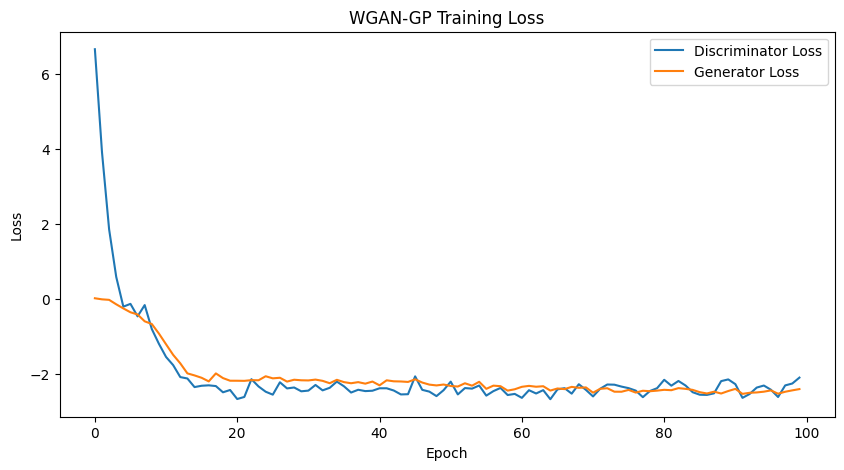

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU, Flatten, Embedding, multiply, concatenate, BatchNormalization
from tensorflow.keras.optimizers import Adam


# Gradient Penalty Loss function
def gradient_penalty_loss(discriminator, real_samples, fake_samples, labels):
    """Computes the gradient penalty."""
    batch_size = tf.shape(real_samples)[0]
    alpha = tf.random.uniform([batch_size, 1], 0., 1.)
    interpolated = alpha * real_samples + (1 - alpha) * fake_samples
    with tf.GradientTape() as tape:
        tape.watch(interpolated)
        labels_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)  # Ensure labels are tensors
        pred = discriminator([interpolated, labels_tensor], training=True)
    grads = tape.gradient(pred, [interpolated])[0]
    grads_norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1]))
    gp = tf.reduce_mean((grads_norm - 1.) ** 2)
    return gp

# Define generator model
def build_generator(latent_dim, num_labels, num_features):
    noise = Input(shape=(latent_dim,))
    label = Input(shape=(1,))
    
    # Label embedding and flattening
    label_embedding = Embedding(num_labels, latent_dim)(label)
    label_embedding = Flatten()(label_embedding)
    
    # Multiply noise with label embedding
    model_input = multiply([noise, label_embedding])
    
    # Generator architecture (increased complexity)
    x = Dense(512)(model_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(1024)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization()(x)
    x = Dense(2048)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = BatchNormalization()(x)
    
    # Output layer
    generated_data = Dense(num_features, activation='tanh')(x)
    
    return Model([noise, label], generated_data)

# Define discriminator model
def build_discriminator(num_features, num_labels):
    features = Input(shape=(num_features,))
    label = Input(shape=(1,))
    
    # Label embedding and flattening
    label_embedding = Embedding(num_labels, num_features)(label)
    label_embedding = Flatten()(label_embedding)
    
    # Concatenate features and label embedding
    model_input = concatenate([features, label_embedding])
    
    # Discriminator architecture (increased complexity)
    x = Dense(1024)(model_input)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(512)(x)
    x = LeakyReLU(alpha=0.2)(x)
    x = Dense(256)(x)
    x = LeakyReLU(alpha=0.2)(x)
    
    # Output layer with no activation (WGAN outputs real values)
    validity = Dense(1)(x)
    
    return Model([features, label], validity)

# Build and compile the models
latent_dim = 100  # Latent space dimension (random noise input)
num_labels = 10   # Number of label classes (modify based on your data)
num_features = 6  # Number of features in the dataset

generator = build_generator(latent_dim, num_labels, num_features)
discriminator = build_discriminator(num_features, num_labels)

# Optimizers with different learning rates for stability
generator_optimizer = Adam(0.0001, beta_1=0.5, beta_2=0.9)
discriminator_optimizer = Adam(0.0001, beta_1=0.5, beta_2=0.9)

# Number of discriminator updates per generator update
n_critic = 5
lambda_gp = 10  # Gradient penalty weight

# Training function
def train_wgan_gp(generator, discriminator, epochs, batch_size, save_interval=10):
    real_data_train, real_data_val = train_test_split(real_data, test_size=0.2)
    
    # Training data
    valid = -np.ones((batch_size, 1))  # WGAN labels: valid = -1
    fake = np.ones((batch_size, 1))    # WGAN labels: fake = 1

    d_losses = []
    g_losses = []

    for epoch in range(epochs):
        for _ in range(n_critic):
            # ---------------------
            #  Train Discriminator
            # ---------------------
            # Select a random batch of real data
            idx = np.random.randint(0, real_data_train.shape[0], batch_size)
            real_samples = real_data_train[idx]
            labels = np.random.randint(0, num_labels, batch_size)
            
            # Generate a batch of fake data
            noise = np.random.normal(0, 1, (batch_size, latent_dim))
            gen_samples = generator.predict([noise, labels])
            
            # Train the discriminator
            with tf.GradientTape() as disc_tape:
                # Discriminator loss on real and fake data
                real_validity = discriminator([real_samples, labels], training=True)
                fake_validity = discriminator([gen_samples, labels], training=True)
                d_loss_real = tf.reduce_mean(real_validity)
                d_loss_fake = tf.reduce_mean(fake_validity)
                
                # Gradient penalty
                gp = gradient_penalty_loss(discriminator, real_samples, gen_samples, labels)
                
                # Total discriminator loss
                d_loss = d_loss_fake - d_loss_real + lambda_gp * gp
            
            # Apply gradients to the discriminator
            d_grads = disc_tape.gradient(d_loss, discriminator.trainable_weights)
            discriminator_optimizer.apply_gradients(zip(d_grads, discriminator.trainable_weights))
        
        # ---------------------
        #  Train Generator
        # ---------------------
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        labels = np.random.randint(0, num_labels, batch_size)
        
        with tf.GradientTape() as gen_tape:
            gen_samples = generator([noise, labels], training=True)
            labels_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)  # Convert labels to tensors
            fake_validity = discriminator([gen_samples, labels_tensor], training=True)

            g_loss = -tf.reduce_mean(fake_validity)
        
        # Apply gradients to the generator
        g_grads = gen_tape.gradient(g_loss, generator.trainable_weights)
        generator_optimizer.apply_gradients(zip(g_grads, generator.trainable_weights))

        # Track losses
        d_losses.append(d_loss)
        g_losses.append(g_loss)

        # Print progress
        print(f"{epoch + 1}/{epochs} [D loss: {d_loss.numpy()}] [G loss: {g_loss.numpy()}]")

        # Save the models at specified intervals
        if (epoch + 1) % save_interval == 0:
            generator.save('wgan_gp_generator.h5')
            discriminator.save('wgan_gp_discriminator.h5')
            print(f"Models saved at epoch {epoch + 1}")
    
    # Plot the losses
    plt.figure(figsize=(10, 5))
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generator Loss')
    plt.title('WGAN-GP Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Example of real data
real_data = np.random.normal(0, 1, (1000, num_features))

# Train the WGAN-GP
train_wgan_gp(generator, discriminator, epochs=100, batch_size=32, save_interval=10)
